<a href="https://colab.research.google.com/github/peiva-git/deep_learning_project/blob/22-add-image-plots-to-simple_modelipynb/simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports, definitions and setup

In [ ]:
!git clone https://github.com/peiva-git/deep_learning_project.git
%cd deep_learning_project
!pip install -e .

In [3]:
import dlproject as dlp
import matplotlib as plt

## Load the MNIST dataset

In [ ]:
dataset_builder = dlp.data.MNISTDatasetBuilder()
dataset_builder.preprocess_dataset()
train_data, test_data = dataset_builder.train_data, dataset_builder.test_data
noisy_train_data, noisy_test_data = dataset_builder.noisy_train_data, dataset_builder.noisy_test_data

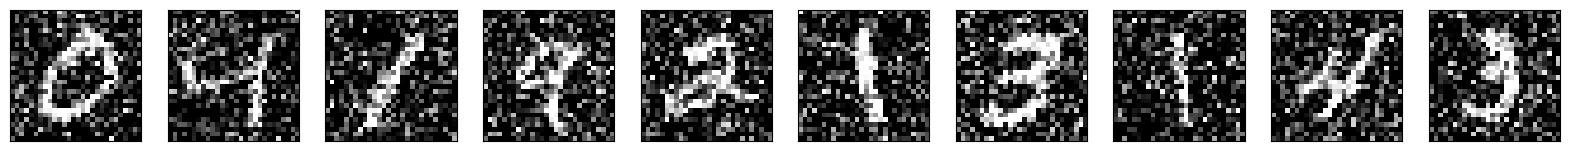

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Instantiate the model

In [5]:
autoencoder = dlp.models.SimpleAutoencoder(input_shape=(28, 28, 1))
autoencoder.model.compile(optimizer='adam', loss='binary_crossentropy')

## Train the model

### Testing the model

First, we train the model to reconstruct the image that's given as an input. The reconstructed images should be similar, but not exactly the same.

In [ ]:
autoencoder.model.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data)
)

Display the results.

In [ ]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.model.predict(test_data)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoise images

Secondly, we retrain the model to reconstruct the image from a noisy input.

In [11]:
autoencoder.model.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data)
)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1031 - val_loss: 0.0946
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0942 - val_loss: 0.0922
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0922 - val_loss: 0.0908
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0911 - val_loss: 0.0899
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0903 - val_loss: 0.0893
Epoch 6/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0892 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0888 - val_loss: 0.0879
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0886 - val_loss: 0.0877
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0883 - val_lo

Let's take a look at the results. Top, the ground truth digits fed to the network, than the noisy version and finally the digits are reconstructed by the network. It seems to work pretty well.

In [ ]:
import matplotlib.pyplot as plt
import random

def display_random_images(test_data, noisy_test_data, autoencoder_model, num_images=10):
    # Randomly select 10 indices from the test dataset
    random_indices = random.sample(range(len(test_data)), num_images)

    plt.figure(figsize=(15, 4))

    for i, idx in enumerate(random_indices):
        # Original clean image
        plt.subplot(3, num_images, i + 1)
        plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Noisy image
        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(noisy_test_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Predicted output from the autoencoder
        predicted_output = autoencoder_model.predict(noisy_test_data[idx].reshape(1, 28, 28, 1))
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(predicted_output[0].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.show()

display_random_images(test_data, noisy_test_data, autoencoder.model)
